# Data science - exercise 9
by Robin Hegenberg, 355386

In [2]:
#Load date.csv
import pandas as pd
df_test = pd.read_csv('https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/classification/data/Assigment/aug_test.csv?raw=true')
df_test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,3,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5,Early Stage Startup,1,34,1
2,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,10,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,NaN,High School,NaN,10,NaN,never,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3,Pvt Ltd,1,198,0


In [3]:
df_train = pd.read_csv('https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/classification/data/Assigment/aug_train.csv?raw=true')
df_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,>4,46,0


# data examination

In [4]:
df_train.tail()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
2095,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,NaN,4,4,0
2096,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,Funded Startup,2,10,1
2097,0.855,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,never,37,0
2098,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,11,0
2099,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Pvt Ltd,>4,82,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2100 non-null   float64
 1   gender                  1585 non-null   object 
 2   relevent_experience     2100 non-null   object 
 3   enrolled_university     2051 non-null   object 
 4   education_level         2049 non-null   object 
 5   major_discipline        1768 non-null   object 
 6   experience              2090 non-null   object 
 7   company_type            1415 non-null   object 
 8   last_new_job            2048 non-null   object 
 9   training_hours          2100 non-null   int64  
 10  target                  2100 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 180.6+ KB


In [6]:
df_train.describe()

,city_development_index,training_hours,target
count,2100.000000,2100.000000,2100.000000
mean,0.826898,65.896190,0.254762
std,0.124464,58.432483,0.435831
min,0.448000,1.000000,0.000000
25%,0.729250,24.000000,0.000000
50%,0.899000,49.000000,0.000000
75%,0.920000,89.250000,1.000000
max,0.949000,336.000000,1.000000


In [7]:
df_train.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_type', 'last_new_job', 'training_hours',
       'target'],
      dtype='object')

In [8]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

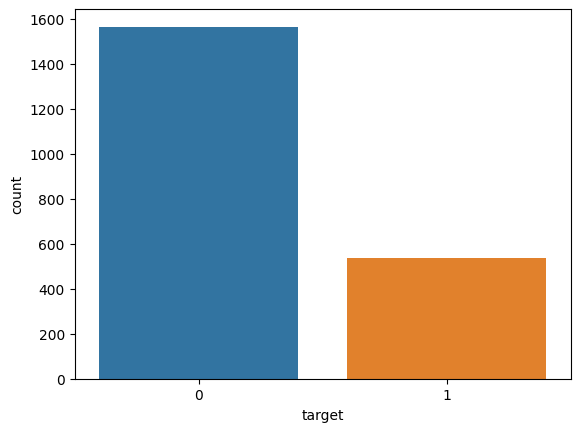

In [9]:
sns.countplot(data=df_train,x='target')

<Axes: xlabel='target', ylabel='count'>

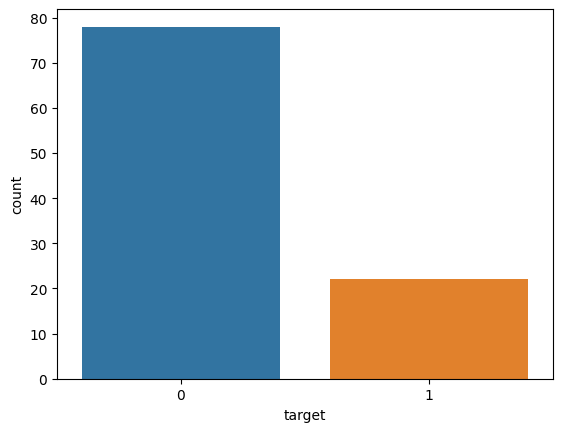

In [10]:
sns.countplot(data=df_test,x='target')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, '0.448'),
  Text(1, 0, '0.479'),
  Text(2, 0, '0.493'),
  Text(3, 0, '0.516'),
  Text(4, 0, '0.518'),
  Text(5, 0, '0.527'),
  Text(6, 0, '0.55'),
  Text(7, 0, '0.555'),
  Text(8, 0, '0.556'),
  Text(9, 0, '0.558'),
  Text(10, 0, '0.579'),
  Text(11, 0, '0.624'),
  Text(12, 0, '0.625'),
  Text(13, 0, '0.64'),
  Text(14, 0, '0.647'),
  Text(15, 0, '0.666'),
  Text(16, 0, '0.68'),
  Text(17, 0, '0.682'),
  Text(18, 0, '0.689'),
  Text(19, 0, '0.691'),
  Text(20, 0, '0.693'),
  Text(21, 0, '0.698'),
  Text(22, 0, '0.722'),
  Text(23, 0, '0.725'),
  Text(24, 0, '0.727'),
  Text(25, 0, '0.73'),
  Text(26, 0, '0.738'),
  Text(2

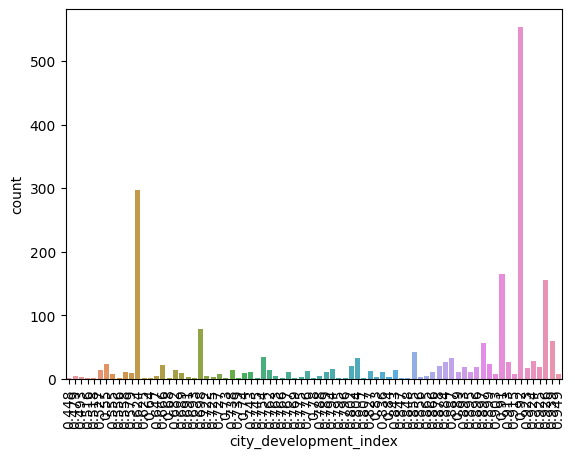

In [11]:
import matplotlib.pyplot  as plt 
sns.countplot(data=df_train,x='city_development_index')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.479'),
  Text(1, 0, '0.55'),
  Text(2, 0, '0.558'),
  Text(3, 0, '0.624'),
  Text(4, 0, '0.64'),
  Text(5, 0, '0.682'),
  Text(6, 0, '0.691'),
  Text(7, 0, '0.698'),
  Text(8, 0, '0.738'),
  Text(9, 0, '0.754'),
  Text(10, 0, '0.766'),
  Text(11, 0, '0.767'),
  Text(12, 0, '0.794'),
  Text(13, 0, '0.795'),
  Text(14, 0, '0.802'),
  Text(15, 0, '0.804'),
  Text(16, 0, '0.843'),
  Text(17, 0, '0.855'),
  Text(18, 0, '0.866'),
  Text(19, 0, '0.884'),
  Text(20, 0, '0.887'),
  Text(21, 0, '0.895'),
  Text(22, 0, '0.896'),
  Text(23, 0, '0.897'),
  Text(24, 0, '0.899'),
  Text(25, 0, '0.91'),
  Text(26, 0, '0.915'),
  Text(27, 0, '0.92'),
  Text(28, 0, '0.923'),
  Text(29, 0, '0.924'),
  Text(30, 0, '0.926'),
  Text(31, 0, '0.939'),
  Text(32, 0, '0.949')])

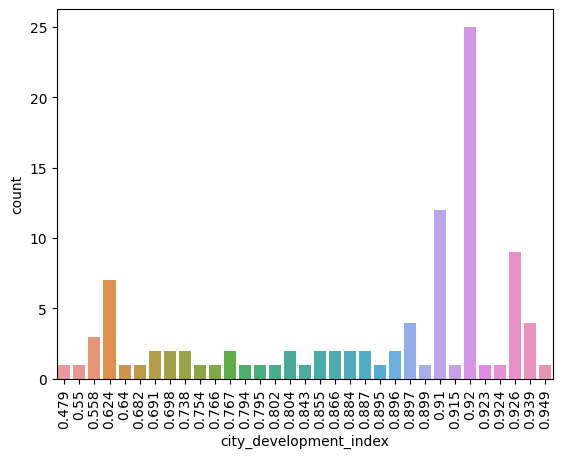

In [12]:
sns.countplot(data=df_test,x='city_development_index')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

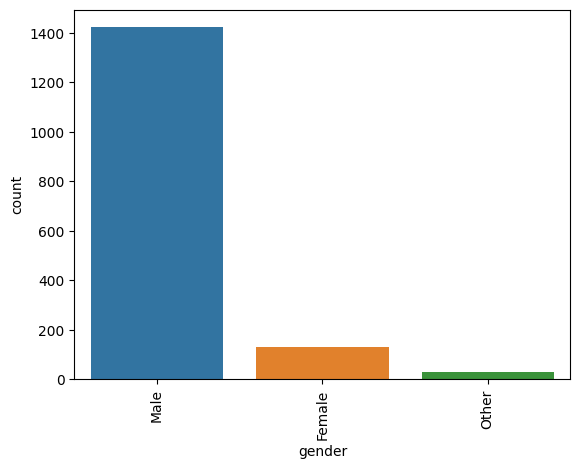

In [13]:
sns.countplot(data=df_train,x='gender')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')])

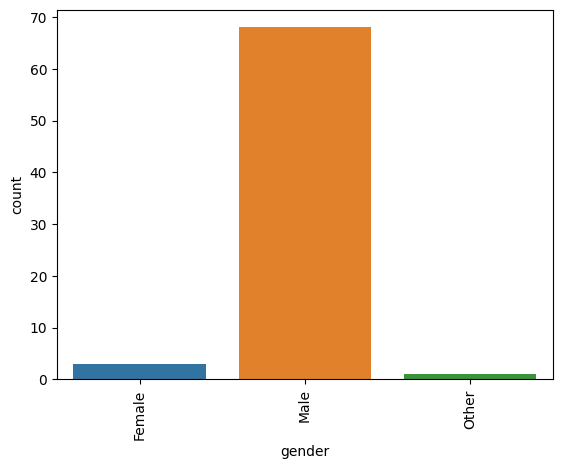

In [14]:
sns.countplot(data=df_test,x='gender')
plt.xticks(rotation=90)

(array([0, 1]),
 [Text(0, 0, 'No relevent experience'), Text(1, 0, 'Has relevent experience')])

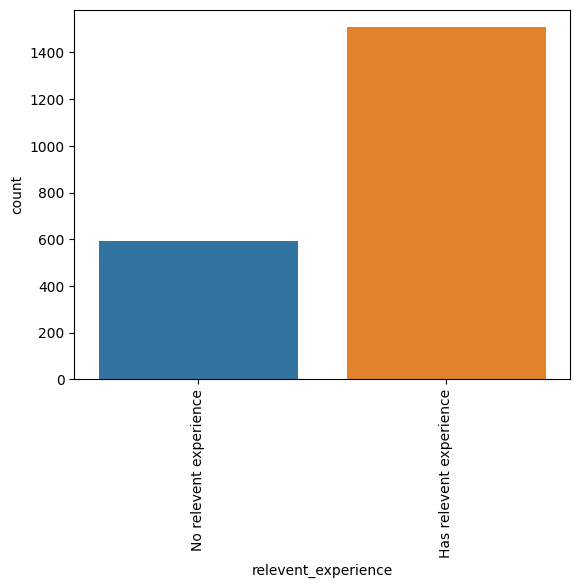

In [15]:
sns.countplot(data=df_train,x='relevent_experience')
plt.xticks(rotation=90)

(array([0, 1]),
 [Text(0, 0, 'Has relevent experience'), Text(1, 0, 'No relevent experience')])

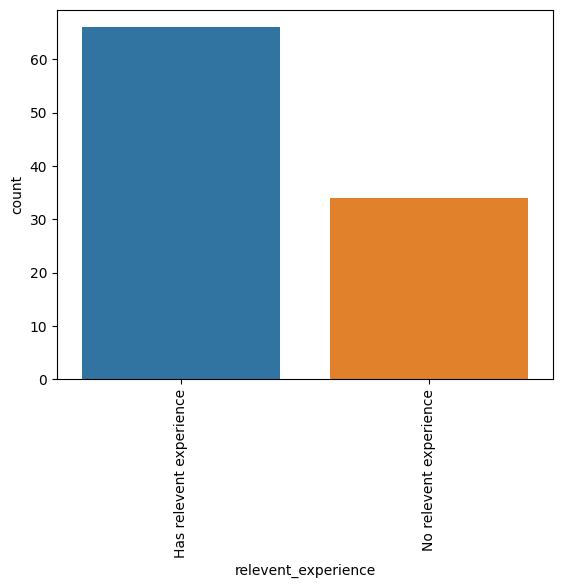

In [16]:
sns.countplot(data=df_test,x='relevent_experience')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'no_enrollment'),
  Text(1, 0, 'Full time course'),
  Text(2, 0, 'Part time course')])

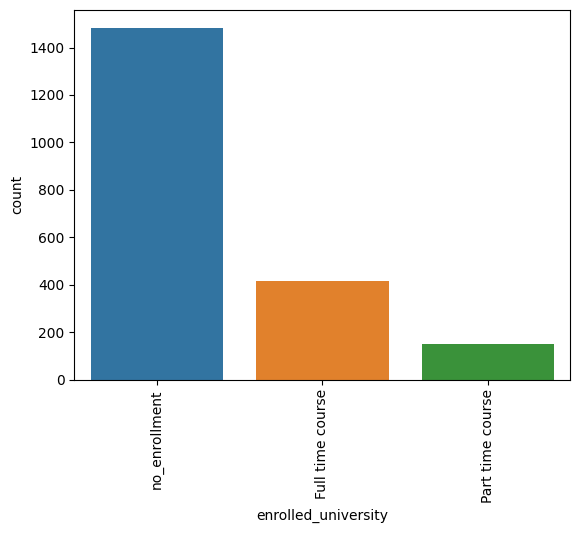

In [17]:
sns.countplot(data=df_train,x='enrolled_university')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Full time course'),
  Text(1, 0, 'no_enrollment'),
  Text(2, 0, 'Part time course')])

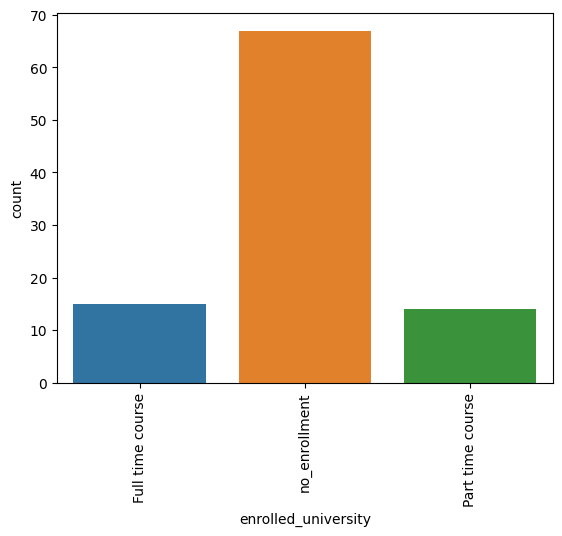

In [18]:
sns.countplot(data=df_test,x='enrolled_university')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'High School'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'Primary School'),
  Text(4, 0, 'Phd')])

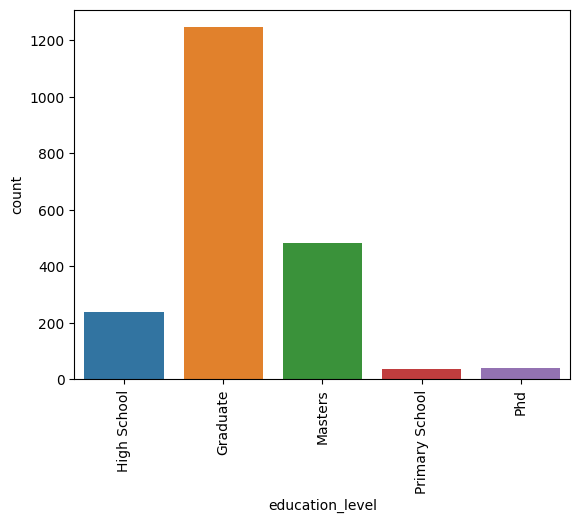

In [19]:
sns.countplot(data=df_train,x='education_level')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Graduate'), Text(1, 0, 'High School'), Text(2, 0, 'Masters')])

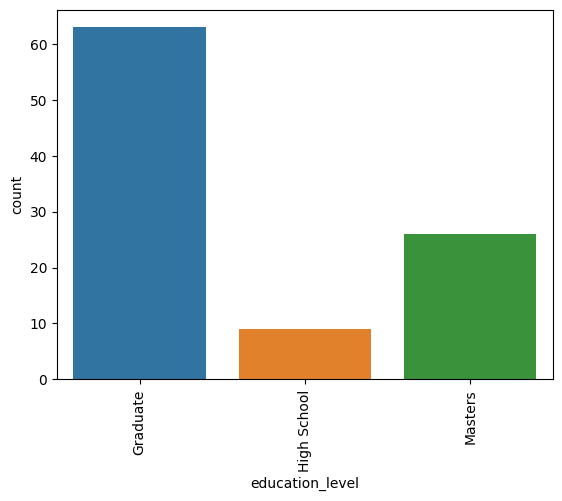

In [20]:
sns.countplot(data=df_test,x='education_level')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Humanities'),
  Text(4, 0, 'Arts'),
  Text(5, 0, 'No Major')])

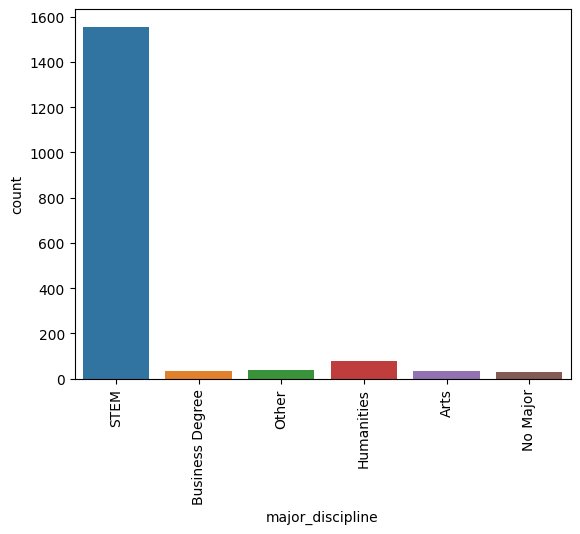

In [21]:
sns.countplot(data=df_train,x='major_discipline')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'STEM'),
  Text(2, 0, 'Arts'),
  Text(3, 0, 'Humanities'),
  Text(4, 0, 'Business Degree')])

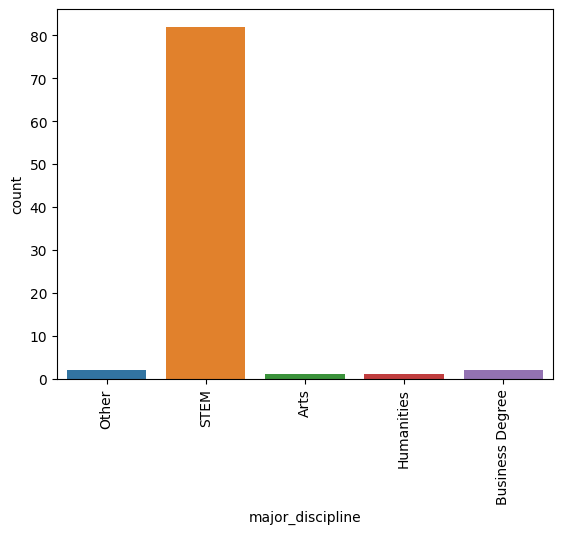

In [22]:
sns.countplot(data=df_test,x='major_discipline')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '5'),
  Text(1, 0, '>20'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '15'),
  Text(5, 0, '3'),
  Text(6, 0, '16'),
  Text(7, 0, '<1'),
  Text(8, 0, '6'),
  Text(9, 0, '7'),
  Text(10, 0, '13'),
  Text(11, 0, '9'),
  Text(12, 0, '4'),
  Text(13, 0, '18'),
  Text(14, 0, '14'),
  Text(15, 0, '17'),
  Text(16, 0, '10'),
  Text(17, 0, '12'),
  Text(18, 0, '11'),
  Text(19, 0, '8'),
  Text(20, 0, '19'),
  Text(21, 0, '20')])

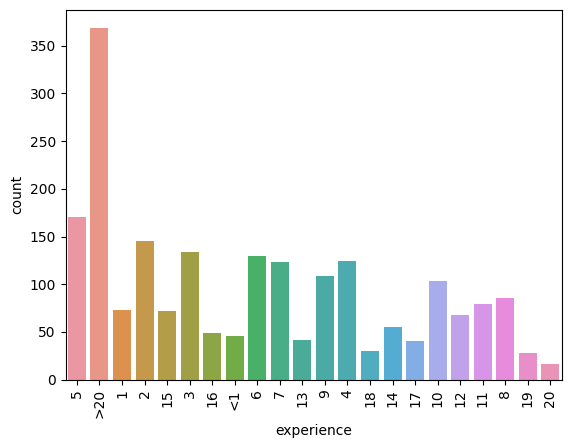

In [23]:
sns.countplot(data=df_train,x='experience')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '3'),
  Text(1, 0, '5'),
  Text(2, 0, '10'),
  Text(3, 0, '14'),
  Text(4, 0, '15'),
  Text(5, 0, '2'),
  Text(6, 0, '8'),
  Text(7, 0, '6'),
  Text(8, 0, '7'),
  Text(9, 0, '1'),
  Text(10, 0, '4'),
  Text(11, 0, '>20'),
  Text(12, 0, '11'),
  Text(13, 0, '12'),
  Text(14, 0, '20'),
  Text(15, 0, '18'),
  Text(16, 0, '<1'),
  Text(17, 0, '16'),
  Text(18, 0, '9'),
  Text(19, 0, '13')])

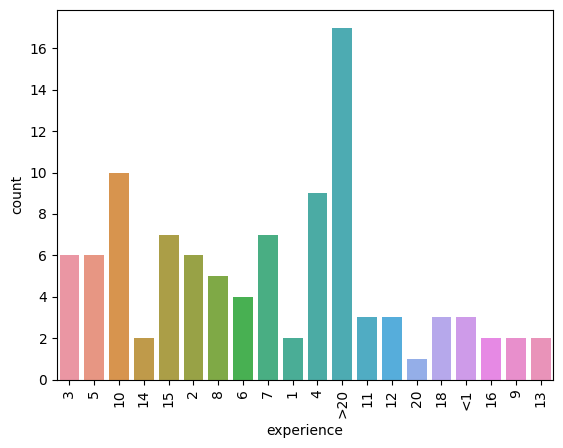

In [24]:
sns.countplot(data=df_test,x='experience')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Public Sector'),
  Text(1, 0, 'Pvt Ltd'),
  Text(2, 0, 'Early Stage Startup'),
  Text(3, 0, 'Funded Startup'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'NGO')])

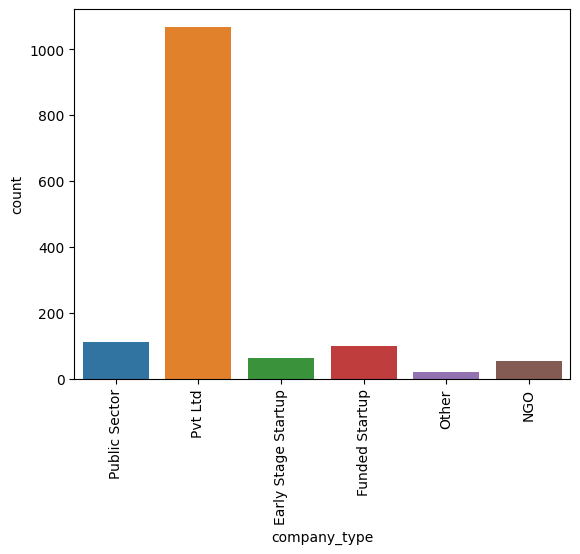

In [25]:
sns.countplot(data=df_train,x='company_type')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Pvt Ltd'),
  Text(1, 0, 'Early Stage Startup'),
  Text(2, 0, 'Funded Startup'),
  Text(3, 0, 'Public Sector'),
  Text(4, 0, 'NGO')])

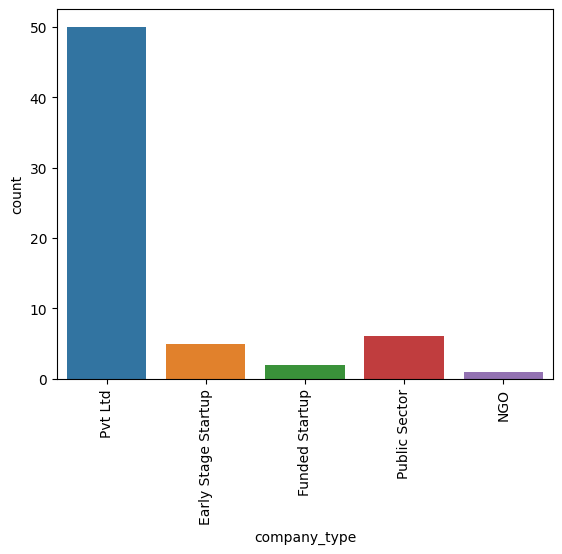

In [26]:
sns.countplot(data=df_test,x='company_type')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'never'),
  Text(1, 0, '>4'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '3'),
  Text(5, 0, '4')])

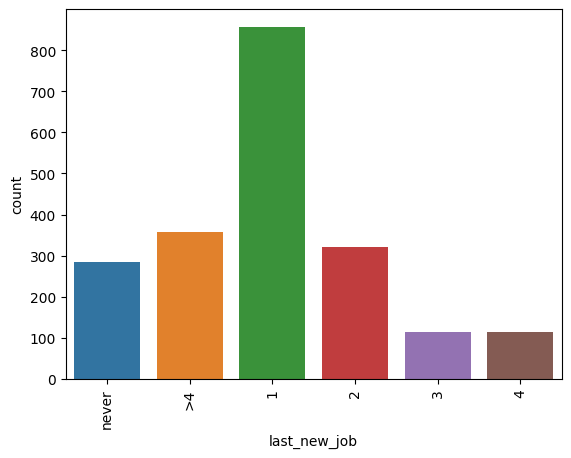

In [27]:
sns.countplot(data=df_train,x='last_new_job')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, 'never'),
  Text(3, 0, '>4'),
  Text(4, 0, '4'),
  Text(5, 0, '3')])

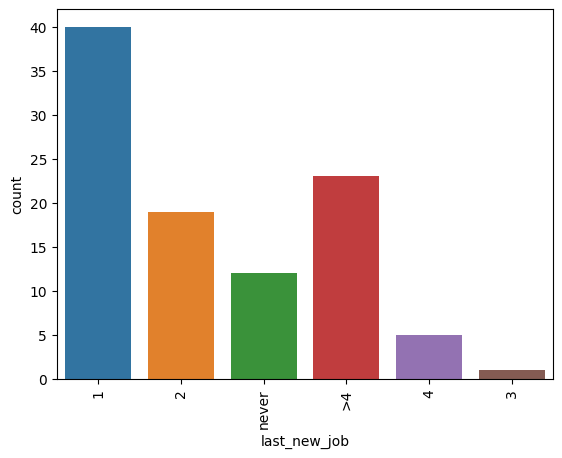

In [28]:
sns.countplot(data=df_test,x='last_new_job')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

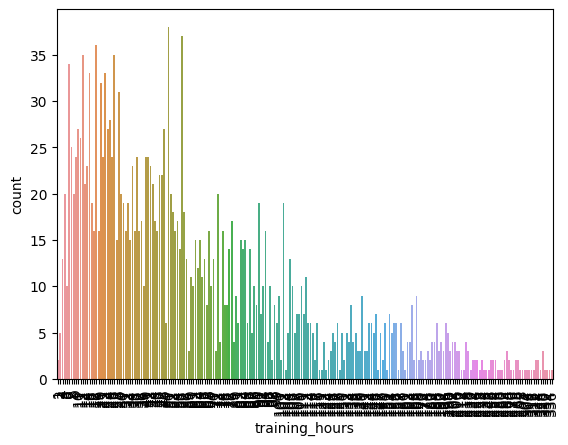

In [29]:
sns.countplot(data=df_train,x='training_hours')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, '4'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17'),
  Text(11, 0, '18'),
  Text(12, 0, '19'),
  Text(13, 0, '20'),
  Text(14, 0, '21'),
  Text(15, 0, '22'),
  Text(16, 0, '23'),
  Text(17, 0, '25'),
  Text(18, 0, '33'),
  Text(19, 0, '34'),
  Text(20, 0, '36'),
  Text(21, 0, '37'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '5

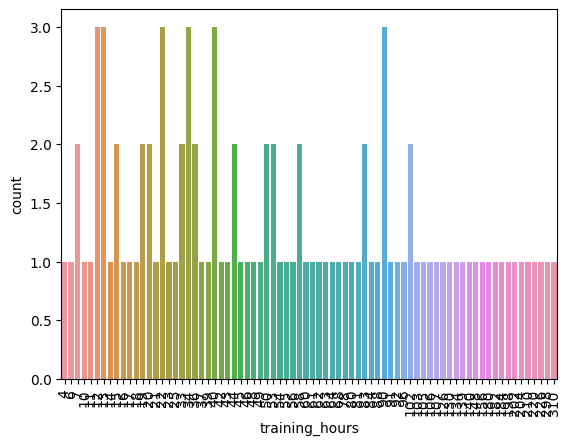

In [30]:
sns.countplot(data=df_test,x='training_hours')
plt.xticks(rotation=90)

In [31]:
#overall, data seems roughly similar distributet in the smaller test set

---

# Data cleaning

1. in experience, replace >20 to 21; <1 to 1, and convert this as a numerical column
2. in last_new_job, replace >4 to 5; never to 0, and convert this as a numerical column
3. If the column is categorical, impute the missing value as its mode. If the column is numerical, impute the missing value as its median

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0')])

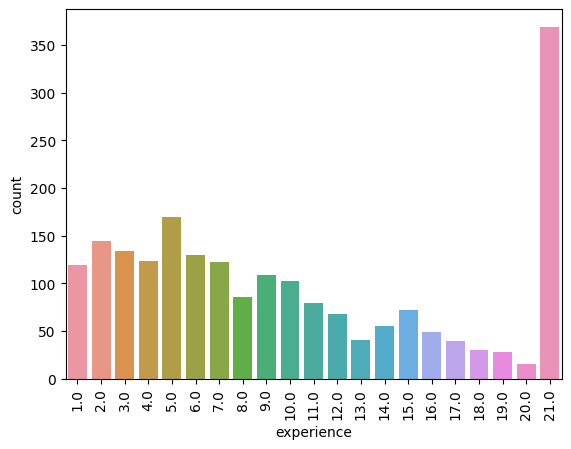

In [32]:
# 1. Replace values in 'experience' column
df_train['experience'] = df_train['experience'].replace('>20', '21')
df_train['experience'] = df_train['experience'].replace('<1', '1')
df_train['experience'] = pd.to_numeric(df_train['experience'])

df_test['experience'] = df_test['experience'].replace('>20', '21')
df_test['experience'] = df_test['experience'].replace('<1', '1')
df_test['experience'] = pd.to_numeric(df_test['experience'])

sns.countplot(data=df_train,x='experience')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '18'),
  Text(17, 0, '20'),
  Text(18, 0, '21')])

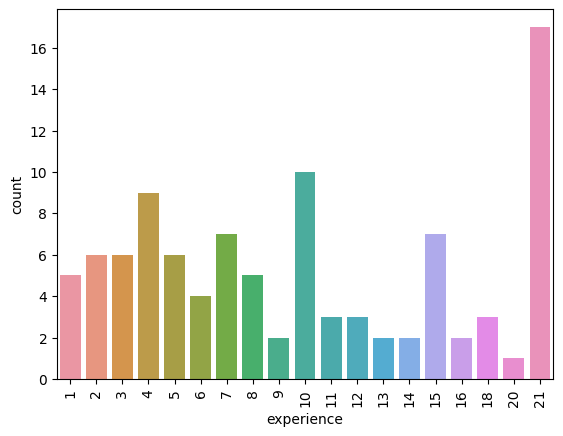

In [33]:
sns.countplot(data=df_test,x='experience')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0')])

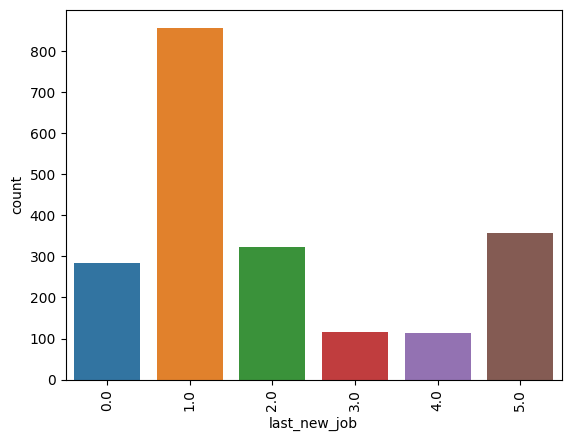

In [34]:
# 2. Replace values in 'last_new_job' column
df_train['last_new_job'] = df_train['last_new_job'].replace('>4', '5')
df_train['last_new_job'] = df_train['last_new_job'].replace('never', '0')
df_train['last_new_job'] = pd.to_numeric(df_train['last_new_job'])

df_test['last_new_job'] = df_test['last_new_job'].replace('>4', '5')
df_test['last_new_job'] = df_test['last_new_job'].replace('never', '0')
df_test['last_new_job'] = pd.to_numeric(df_test['last_new_job'])

sns.countplot(data=df_train,x='last_new_job')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

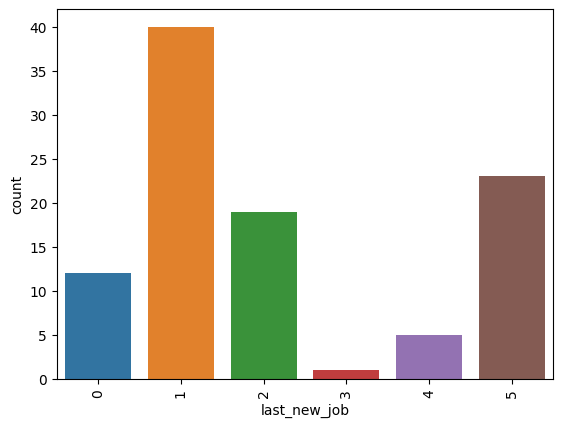

In [35]:
sns.countplot(data=df_test,x='last_new_job')
plt.xticks(rotation=90)

In [36]:
# 3. Impute missing values
df_train.dtypes

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_type               object
last_new_job              float64
training_hours              int64
target                      int64
dtype: object

In [37]:
# Checking null values 
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

about_data(df_train)

,columns,total missing,ration of missing
0,city_development_index,0,0.000000
1,gender,515,0.245238
2,relevent_experience,0,0.000000
3,enrolled_university,49,0.023333
4,education_level,51,0.024286
5,major_discipline,332,0.158095
6,experience,10,0.004762
7,company_type,685,0.326190
8,last_new_job,52,0.024762
9,training_hours,0,0.000000


In [38]:
about_data(df_test)

,columns,total missing,ration of missing
0,city_development_index,0,0.00
1,gender,28,0.28
2,relevent_experience,0,0.00
3,enrolled_university,4,0.04
4,education_level,2,0.02
5,major_discipline,12,0.12
6,experience,0,0.00
7,company_type,36,0.36
8,last_new_job,0,0.00
9,training_hours,0,0.00


In [39]:
mask = df_train.isna().any(axis=1)

# Show rows with missing values before replacement
print("Rows with missing values before replacement:")
print(df_train[mask])

# Replace missing values with mode or median
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        # Categorical column, impute with mode
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    else:
        # Numerical column, impute with median
        df_train[col] = df_train[col].fillna(df_train[col].median())

# Show rows that had missing values after replacement
print("Rows that had missing values after replacement:")
print(df_train[mask]) #for example, in row 1 major_disciple was missing, got replaced by STEM. Which is the mode

Rows with missing values before replacement:
      city_development_index  gender      relevent_experience   
0                      0.624    Male   No relevent experience  \
1                      0.926    Male  Has relevent experience   
3                      0.624    Male   No relevent experience   
4                      0.920  Female  Has relevent experience   
5                      0.920     NaN   No relevent experience   
...                      ...     ...                      ...   
2093                   0.887     NaN  Has relevent experience   
2094                   0.920    Male   No relevent experience   
2095                   0.920    Male  Has relevent experience   
2097                   0.855    Male   No relevent experience   
2098                   0.920    Male   No relevent experience   

     enrolled_university education_level major_discipline  experience   
0          no_enrollment     High School              NaN         5.0  \
1          no_enrollment    

In [40]:
about_data(df_train)

,columns,total missing,ration of missing
0,city_development_index,0,0.0
1,gender,0,0.0
2,relevent_experience,0,0.0
3,enrolled_university,0,0.0
4,education_level,0,0.0
5,major_discipline,0,0.0
6,experience,0,0.0
7,company_type,0,0.0
8,last_new_job,0,0.0
9,training_hours,0,0.0


In [41]:
mask = df_test.isna().any(axis=1)

# Show rows with missing values before replacement
print("Rows with missing values before replacement:")
print(df_test[mask])

# Replace missing values with mode or median
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        # Categorical column, impute with mode
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    else:
        # Numerical column, impute with median
        df_test[col] = df_test[col].fillna(df_test[col].median())

# Show rows that had missing values after replacement
print("Rows that had missing values after replacement:")
print(df_test[mask])

Rows with missing values before replacement:
    city_development_index gender      relevent_experience   
0                    0.624    NaN  Has relevent experience  \
2                    0.767    NaN  Has relevent experience   
3                    0.910   Male   No relevent experience   
7                    0.691    NaN   No relevent experience   
8                    0.897    NaN   No relevent experience   
9                    0.939    NaN   No relevent experience   
10                   0.887   Male   No relevent experience   
12                   0.920    NaN  Has relevent experience   
14                   0.920   Male   No relevent experience   
16                   0.926    NaN  Has relevent experience   
18                   0.558    NaN  Has relevent experience   
20                   0.897   Male   No relevent experience   
21                   0.926    NaN   No relevent experience   
23                   0.920   Male  Has relevent experience   
24                   0.68

In [42]:
df_test[df_test.isna().any(axis=1)] #empty

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target


---

# Visualization

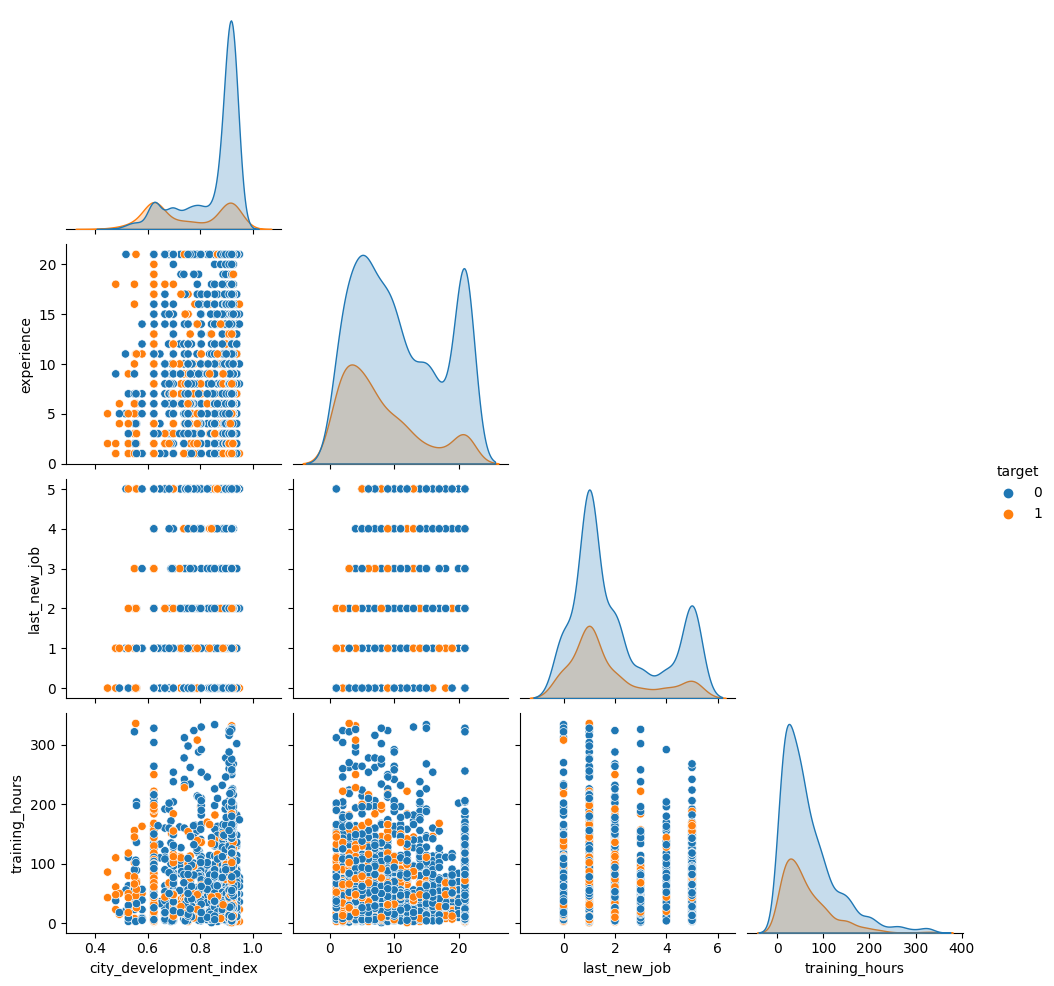

In [43]:
sns.pairplot(df_train,hue='target',corner=True)

In [44]:
#doesn't seem obvious because it's very mixed. Maybe city_development_index is an ok indicator ->ML agrees later on

In [45]:
import numpy as np
def hist(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.histplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

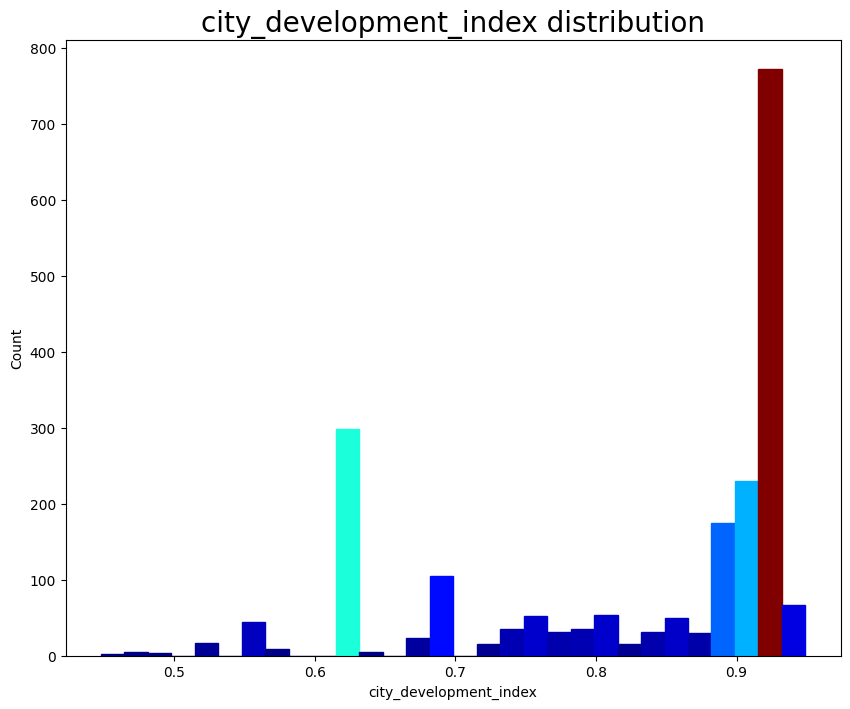

In [46]:
hist(df_train.city_development_index,"city_development_index distribution")

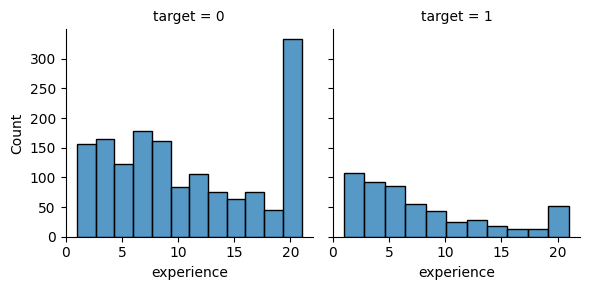

In [47]:
grid = sns.FacetGrid(df_train, col='target')
grid = grid.map(sns.histplot, "experience") #target 0 seems to have the higher experience, that makes sense

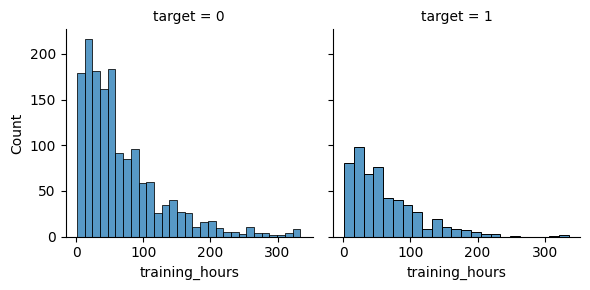

In [48]:
grid = sns.FacetGrid(df_train, col='target')
grid = grid.map(sns.histplot, "training_hours")

---

# Data preparation

balance out our dataset, and we need to change categorical values to numeric values. We have 3 choices. First is Labelencoder and second One hot encoder and last is pandas dummy. Approach will be decided by how many unique values column have.

Labelencoder: useful when there is a natural ordering. Converts [a,b,c] to [0,1,2]
One hot encoder gives each its own class [a,b,c]->[is_a, is_b, is_c]
pandas get_dummies is similar to on hot encoding but applies directly to the dataframe

here, we have a relatively small subset of categories so I use get_dummies

In [49]:
cat_cols = df_train.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_type'],
      dtype='object')

In [50]:
df_train_dumy = pd.get_dummies(df_train, columns = cat_cols)
df_train_dumy

,city_development_index,experience,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.624,5.0,0.0,21,0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0.926,21.0,5.0,12,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0.920,21.0,5.0,26,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.624,1.0,0.0,30,1,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0.920,21.0,5.0,46,0,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.920,17.0,4.0,4,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2096,0.920,8.0,2.0,10,1,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2097,0.855,1.0,0.0,37,0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2098,0.920,21.0,1.0,11,0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [51]:
#doing the same for test will not work since there are categories in train that do not exist in test -> add columns from train and set them to False

# Encode categorical columns in test set
df_test_dumy = pd.get_dummies(df_test, columns=cat_cols)

# Ensure test set has the same columns as training set
df_test_dumy = df_test_dumy.reindex(columns=df_train_dumy.columns, fill_value=False)

df_test_dumy

,city_development_index,experience,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.624,3,1,134,0,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0.920,5,1,34,1,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
2,0.767,10,2,90,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,0.910,10,0,42,0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0.624,3,1,198,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.698,7,0,139,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
96,0.926,10,2,45,1,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
97,0.920,7,1,22,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
98,0.939,7,1,182,0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True


# Task 2: Classification

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Split the data into features (X) and target (y)
X_train = df_train_dumy.drop('target', axis=1)
y_train = df_train_dumy['target']
X_test = df_test_dumy.drop('target', axis=1)
y_test = df_test_dumy['target']

y_test

0     0
1     1
2     0
3     0
4     0
     ..
95    0
96    1
97    0
98    0
99    0
Name: target, Length: 100, dtype: int64

In [54]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
2095    0
2096    1
2097    0
2098    0
2099    0
Name: target, Length: 2100, dtype: int64

In [55]:
X_train

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.624,5.0,0.0,21,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0.926,21.0,5.0,12,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.920,21.0,5.0,26,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,0.624,1.0,0.0,30,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
4,0.920,21.0,5.0,46,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.920,17.0,4.0,4,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2096,0.920,8.0,2.0,10,False,True,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2097,0.855,1.0,0.0,37,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2098,0.920,21.0,1.0,11,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


# data set is imbalanced
we need to balance it out or else ML would just guess the bigger category every time and do fine

<Axes: xlabel='target', ylabel='count'>

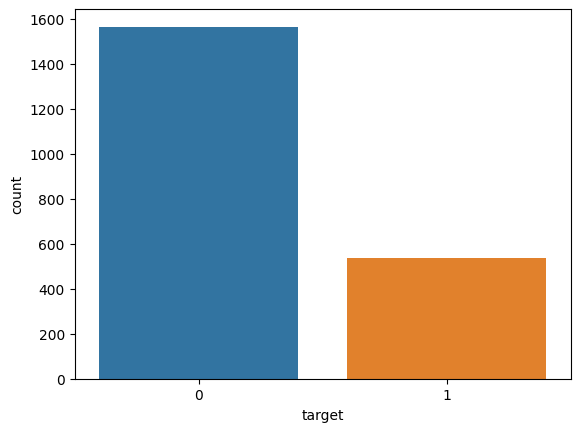

In [56]:
sns.countplot(x=y_train)

In [57]:
sum(y_train)

535

In [58]:
# I use random oversampling. Could use undersampling aswell
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [59]:
sum(y_train_ros)

1565

<Axes: xlabel='target', ylabel='count'>

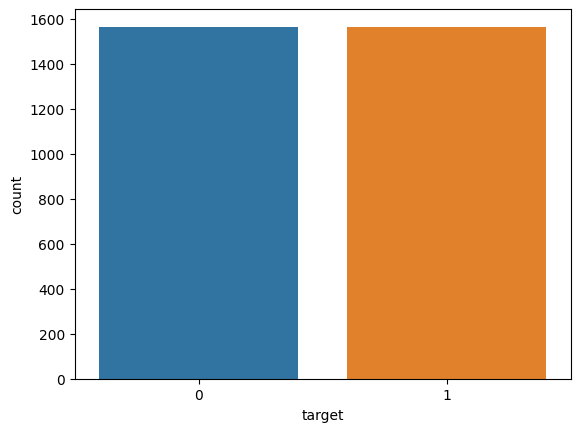

In [60]:
sns.countplot(x=y_train_ros)

test dataset does not need these adjustments, it's for testing the "real" data

# scale data

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
scaled_X_train_ros = scaler.fit_transform(X_train_ros)
scaled_X_test = scaler.transform(X_test)

In [63]:
scaled_X_train_ros


array([[-1.32008121, -0.66718506, -1.16549404, ..., -0.09500755,
        -0.23438781,  0.42873349],
       [ 0.9241993 ,  1.73694704,  1.93654366, ..., -0.09500755,
        -0.23438781,  0.42873349],
       [ 0.87961095,  1.73694704,  1.93654366, ..., -0.09500755,
         4.2664334 , -2.33245133],
       ...,
       [ 0.87961095,  0.53488099, -0.5450865 , ..., -0.09500755,
        -0.23438781,  0.42873349],
       [-0.77015817, -0.51692681, -0.5450865 , ..., -0.09500755,
        -0.23438781,  0.42873349],
       [-1.32008121, -1.26821809, -0.5450865 , ..., -0.09500755,
        -0.23438781,  0.42873349]])

# initial model evaluations

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer



In [65]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier()),
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]

for name, model in model_list:
    kfold = KFold(n_splits=10)
    scoring = {'precision': 'precision', 'accuracy': 'accuracy', 'recall': 'recall', 'f1': 'f1'}
    cv_results = cross_validate(model, scaled_X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    
    precision_cv = cv_results['test_precision']
    accuracy_cv = cv_results['test_accuracy']
    recall_cv = cv_results['test_recall']
    f1_cv = cv_results['test_f1']
    
    res = "{}: Precision: {} ({}), Accuracy: {} ({}), Recall: {} ({}), F1-score: {} ({})".format(name, precision_cv.mean(), precision_cv.std(), accuracy_cv.mean(), accuracy_cv.std(), recall_cv.mean(), recall_cv.std(), f1_cv.mean(), f1_cv.std())
    print(res)

LR: Precision: 0.6341002372146319 (0.25138267136792286), Accuracy: 0.6744408945686902 (0.05090711204430479), Recall: 0.6575430830096702 (0.05439838301685845), F1-score: 0.6156467370316947 (0.10587381113278968)
KNN: Precision: 0.6065099270303353 (0.2709675173391193), Accuracy: 0.6884984025559105 (0.053120720825536726), Recall: 0.7679658302614423 (0.03524487115012268), F1-score: 0.6456574300857738 (0.15522090495322508)
DTC: Precision: 0.7182728067007617 (0.19718534511937633), Accuracy: 0.8645367412140574 (0.0906492869547689), Recall: 0.9425364767703345 (0.0444471612628391), F1-score: 0.804177787840975 (0.1373402308545516)
RFC: Precision: 0.7585367514295962 (0.174740871107628), Accuracy: 0.892332268370607 (0.07495469137395318), Recall: 0.9534084790505629 (0.04070641610010058), F1-score: 0.8364387335577952 (0.11744303413736476)


# tune RFC
as RFC is most likely the best option here (highest precision, etc.)

In [66]:
from sklearn.model_selection import GridSearchCV

parameters_for_testing = {
"n_estimators"    : [2,3,4,5,6,7,8,9,10] ,
 "max_features"        : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],
}
model = RandomForestClassifier()

kfold = KFold(n_splits=5)
grid_cv = GridSearchCV(estimator=model, param_grid=parameters_for_testing, scoring='accuracy', cv=kfold)
result = grid_cv.fit(scaled_X_train_ros, y_train_ros)

print("Best: {} using {}".format(result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{}  {} with: {}" .format(mean, stdev, param))

Best: 0.8779552715654951 using {'max_features': 10, 'n_estimators': 10}
0.7964856230031949  0.027345704698441723 with: {'max_features': 1, 'n_estimators': 2}
0.8236421725239615  0.07404700463327812 with: {'max_features': 1, 'n_estimators': 3}
0.8428115015974441  0.03230788710596064 with: {'max_features': 1, 'n_estimators': 4}
0.8345047923322684  0.07886004045435945 with: {'max_features': 1, 'n_estimators': 5}
0.8476038338658147  0.052745658999332756 with: {'max_features': 1, 'n_estimators': 6}
0.8418530351437699  0.07918554682049656 with: {'max_features': 1, 'n_estimators': 7}
0.8613418530351439  0.05291761101864626 with: {'max_features': 1, 'n_estimators': 8}
0.8444089456869011  0.07771265866054118 with: {'max_features': 1, 'n_estimators': 9}
0.864856230031949  0.06534776515413593 with: {'max_features': 1, 'n_estimators': 10}
0.8140575079872203  0.021588557069043016 with: {'max_features': 2, 'n_estimators': 2}
0.8134185303514376  0.08664216304025972 with: {'max_features': 2, 'n_estima

# cheating the best value for amount of features to use
this suggests that 22 features with 10 estimators is best. However:

I let this run multiple times and it suggests different numbers of features every time, but always the maximum amount of 10 estimators. The number of estimators refers to the complexity of the model (tree depth). So a large number is likely to overfit to the training set. (and it does, I confirmed it and it gives 99,99% accuracy on the training set while having ~75% on the test set using n_estimators=100,=10,=6)

Also, it suggests a different number of features every time, I had everything between 6 and 29. While this also adds to the complexity, I found out that there is a significant difference between training and test results regardless of how many features I use. So this is not underfitting or overfitting, this is the data. So I am a bit unsure of how many features to use. Since there does not seem to be overfitting with 29 features, I would've just use all of them. A bit of cheating shows that my best bet would have been 11 features for this specific test set though. And the performance doesn't increase much further after just 5 features. So I'll use 5 features here.

Also later on I found out that there is a rule of thumb to use sqrt(features), which is sqrt(29)=~5 here.

In [67]:
#cheating, shows that using 11 features would've been best for this specific test dataset. 
#It's really marginal though and if I had another test set, I would suggest to use just 5 as the accuracy doesn't get much better at this point
#I did this to confirm that I haven't overlooked anything obvious choosing this number
'''for max_features in range(1, 30):
    train_accuracies = []
    test_accuracies = []
    for i in range(100):
        tuned_model_rf = RandomForestClassifier(n_estimators=4, max_features=max_features)
        tuned_model_rf.fit(scaled_X_train_ros, y_train_ros)
        train_predictions = tuned_model_rf.predict(scaled_X_train_ros)
        predictions = tuned_model_rf.predict(scaled_X_test)
        train_accuracy = accuracy_score(y_train_ros, train_predictions)
        test_accuracy = accuracy_score(y_test, predictions)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    print(f"max_features: {max_features} | mean train accuracy: {np.mean(train_accuracies)} | mean test accuracy: {np.mean(test_accuracies)}")
'''
'''gives 
max_features: 1 | mean train accuracy: 0.9839968051118211 | mean test accuracy: 0.7474999999999998
max_features: 2 | mean train accuracy: 0.9840766773162939 | mean test accuracy: 0.7521000000000001 and so on'''

'gives \nmax_features: 1 | mean train accuracy: 0.9839968051118211 | mean test accuracy: 0.7474999999999998\nmax_features: 2 | mean train accuracy: 0.9840766773162939 | mean test accuracy: 0.7521000000000001 and so on'

# how to actually find them

later on I found out that there is a rule of thumb to use approximately the square root. In this case: sqrt(29), which is basically 5. Pretty good rule.

Or look at the feature importance later on to decide.

# "best" model

In [68]:
#use 4 estimators and sqrt(29)->5 features
tuned_model_rf = RandomForestClassifier(n_estimators=4,max_features=5)
tuned_model_rf.fit(scaled_X_train_ros, y_train_ros)
train_predictions = tuned_model_rf.predict(scaled_X_train_ros)
predictions = tuned_model_rf.predict(scaled_X_test)

# training set performance
previous attempts with deep trees had almost 100% accuracy, precision, etc., signaling overfitting

this here is still very very good, but more reasonable (98% while having a relatively very low complexity)

In [69]:
train_predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
train_accuracy = accuracy_score(y_train_ros,train_predictions)
train_accuracy

0.9853035143769968

In [71]:
train_precision = precision_score(y_train_ros,train_predictions)
train_precision

0.9865470852017937

In [72]:
train_recall = recall_score(y_train_ros,train_predictions)
train_recall

0.9840255591054313

In [73]:
train_f1 =f1_score(y_train_ros,train_predictions)
train_f1

0.9852847088931541

In [74]:
cm = confusion_matrix(y_train_ros,train_predictions)
cm

array([[1544,   21],
       [  25, 1540]], dtype=int64)

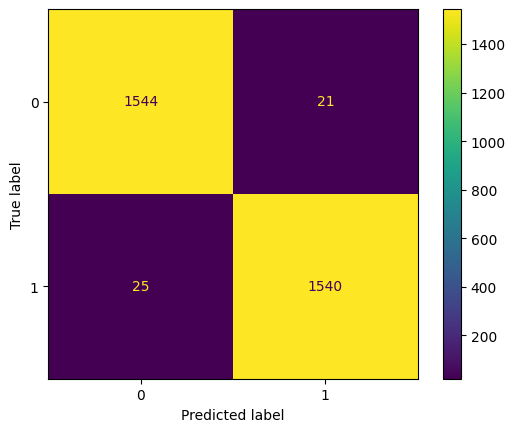

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tuned_model_rf.classes_)
disp.plot()

# test set performance
very good accuracy given that it is a test szenario. significantly worse than the training predictions though. Signals bad predictions for positives - due to imbalance even though we used random oversampling?

In [76]:
test_accuracy = accuracy_score(y_test,predictions)
test_accuracy #best I got was 0.82

0.78

In [77]:
test_precision = precision_score(y_test,predictions)
test_precision

0.5

In [78]:
test_recall = recall_score(y_test,predictions)
test_recall

0.2727272727272727

In [79]:
test_f1 = f1_score(y_test,predictions)
test_f1

0.3529411764705882

In [80]:
cm = confusion_matrix(y_test,predictions)
cm

array([[72,  6],
       [16,  6]], dtype=int64)

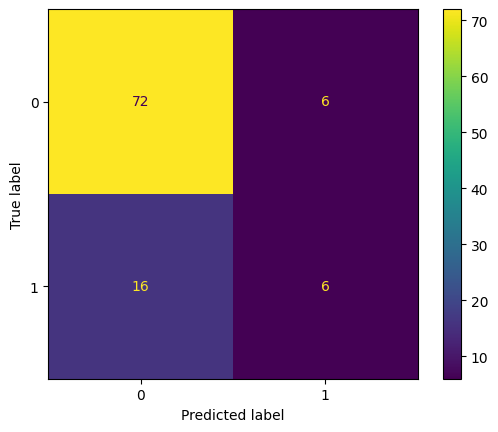

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tuned_model_rf.classes_)
disp.plot()

In [82]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.92      0.87        78\n           1       0.50      0.27      0.35        22\n\n    accuracy                           0.78       100\n   macro avg       0.66      0.60      0.61       100\nweighted avg       0.75      0.78      0.75       100\n'

---

# comparison
the results for the training data are significantly better than the test results:

the training results are almost perfect: not 100% (overfitting), but very close (~98%, 99%) while having a relatively low complexity (4 estimators, 5 features) ->very good

the test results are always significantly lower:

An accuracy of ~0.78 is still relatively good though, correctly classifying most of the data

The precision of ~0.5 refers to the number of positive predictions made by the model, that were actually positive.

The recall of just ~0.27 means that my model classified that many of all positive instances in the test data correctly 

(And the f1 of 0.36 is calculated by precision and recall)

---

This means that my model is very bad at predicting positive instances. This is especially interesting because I used random oversampling to have more positive instances. Do not use it in production





# feature importance

In [83]:
# Get feature importances
importances = tuned_model_rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train_ros.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(scaled_X_train_ros.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. training_hours (0.2661545058138428)
2. city_development_index (0.2541894947901651)
3. experience (0.1717840473347589)
4. last_new_job (0.07665388326042166)
5. enrolled_university_no_enrollment (0.02159541643929218)
6. enrolled_university_Full time course (0.017787230954749086)
7. education_level_Graduate (0.016431810722192734)
8. relevent_experience_Has relevent experience (0.014991237725486283)
9. education_level_High School (0.014902581437086771)
10. relevent_experience_No relevent experience (0.014636494039104705)
11. major_discipline_STEM (0.01226162529596065)
12. company_type_Pvt Ltd (0.012216044999631278)
13. education_level_Masters (0.011812349211881474)
14. gender_Female (0.01027277953897119)
15. gender_Male (0.010082390651588407)
16. company_type_Public Sector (0.009232733115175664)
17. major_discipline_Humanities (0.008611841210642464)
18. company_type_Funded Startup (0.008458822337394664)
19. enrolled_university_Part time course (0.008411819359399221)
20.

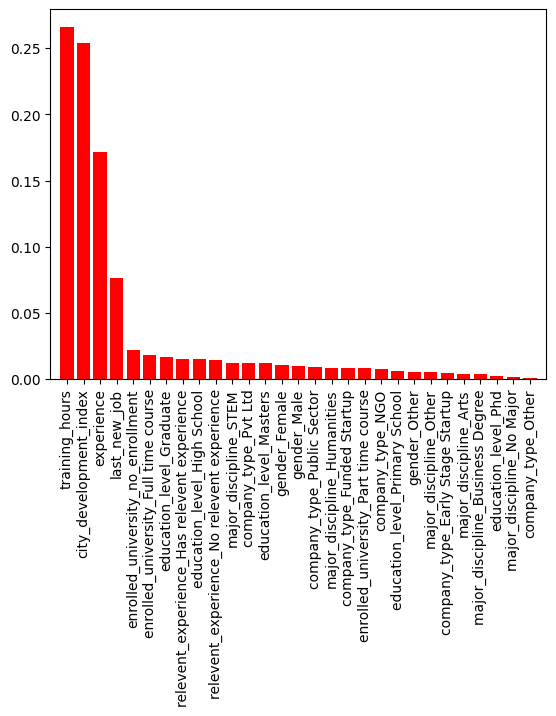

In [84]:
# bar plot
plt.bar(range(scaled_X_train_ros.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(scaled_X_train_ros.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, scaled_X_train_ros.shape[1]])
plt.show()